## 📦 Import Required Libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE

## 📊 Load HR Dataset

In [6]:
df = pd.read_csv("HR_Dataset.csv")

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## ℹ️ Display DataFrame Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 🔢 Descriptive Statistics

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 🔍 Separate Target and Classify Feature Types

In [12]:
# Cat OR Quant :
x=df.drop('left',axis=1)
y=df['left']

cat = []
quant = []
for col in x.columns:
  if df[col].dtype == 'object':
    cat.append(col)
  else:
    quant.append(col)

## 🔍 Check for Missing Values

In [14]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

## 🛠 Handle Missing Values

In [16]:
# if there is null in data we use this code

for col in cat:
    df[col] = df[col].fillna(df[col].mode()[0])
    
for col in quant:
    df[col] = df[col].fillna(df[col].median())

## 🔍 Check for Duplicate Rows

In [18]:
# checking the duplicate

df.duplicated().sum()

3008

## 🗑 Remove Duplicate Rows

In [20]:
# if there is duplicate in data we use this code

df = df.drop_duplicates()


## ℹ️ DataFrame Info After Deduplication 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Departments            11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## 📊 Boxplots of Numerical Features

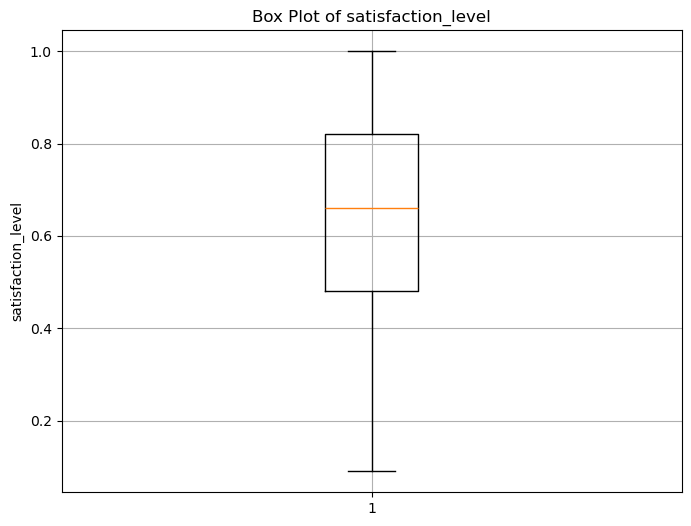

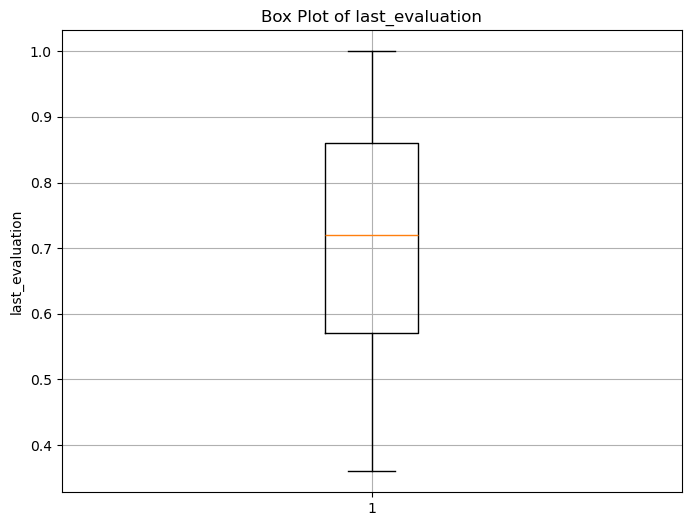

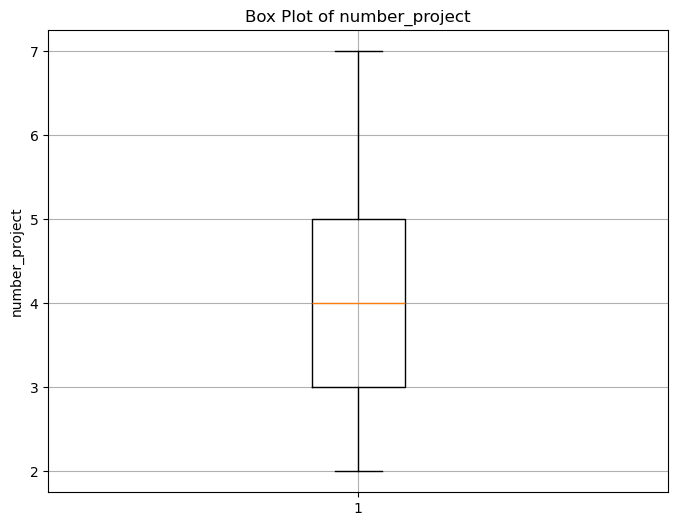

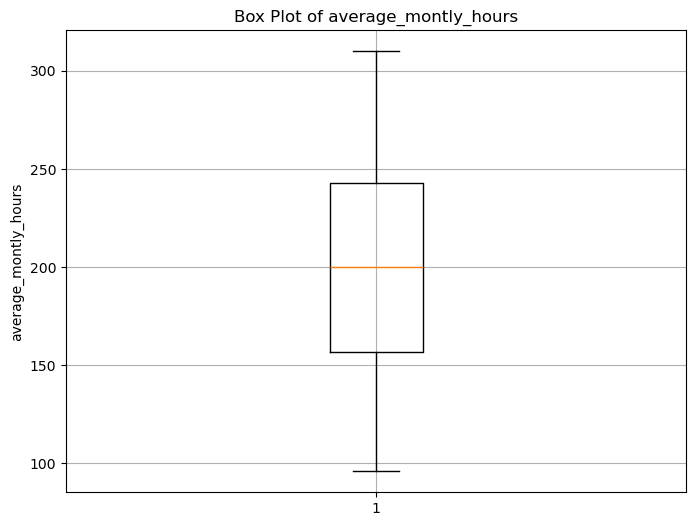

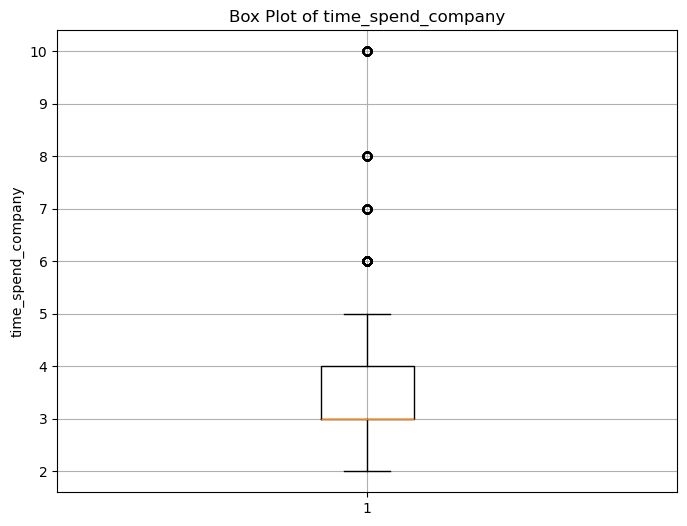

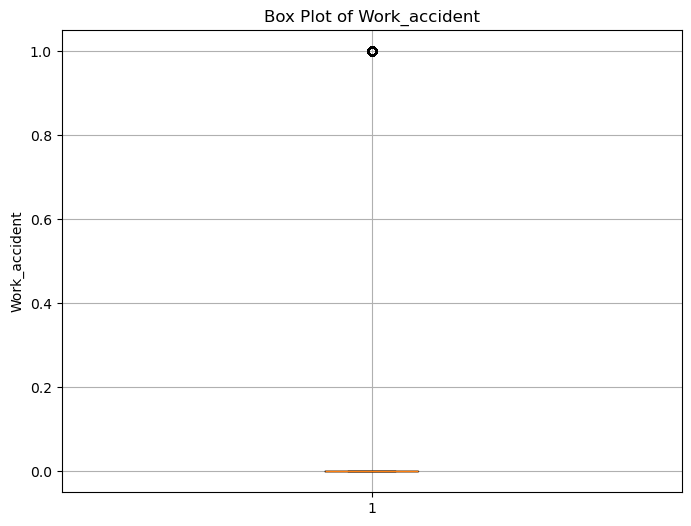

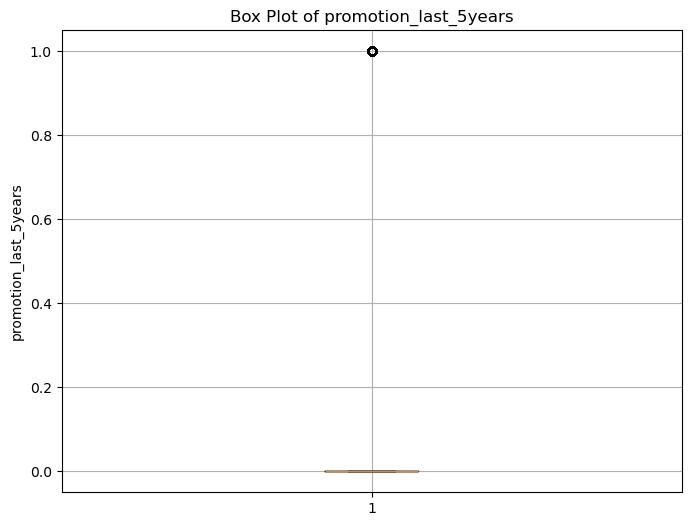

In [24]:
# checking box plot 

for col in quant:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## 🔍 Identify Outliers

In [26]:
# check how many outliers do we have 

for i,col in enumerate(quant):
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        outliers=df[col][(df[col]<lower_bound) | (df[col]>upper_bound)] 
        print(f"{i+1}: {col} - {len(outliers)}")

1: satisfaction_level - 0
2: last_evaluation - 0
3: number_project - 0
4: average_montly_hours - 0
5: time_spend_company - 824
6: Work_accident - 1850
7: promotion_last_5years - 203


## 🗑 Remove Outliers

In [28]:
# remove the outliers that's not effect our data

for col in quant:
    if col not in ['time_spend_company','Work_accident','promotion_last_5years']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## 📊 Pie Chart of Attrition

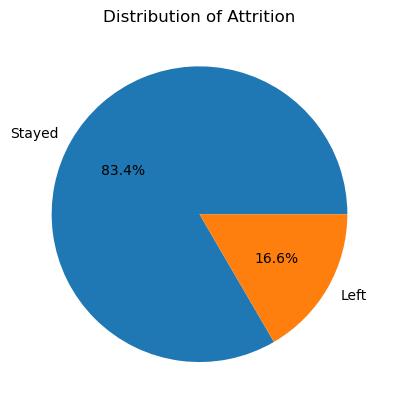

In [30]:
attrition_counts = df['left'].value_counts()
plt.pie(attrition_counts.values, labels= ['Stayed', 'Left'], autopct='%1.1f%%')
plt.title('Distribution of Attrition')
plt.show()

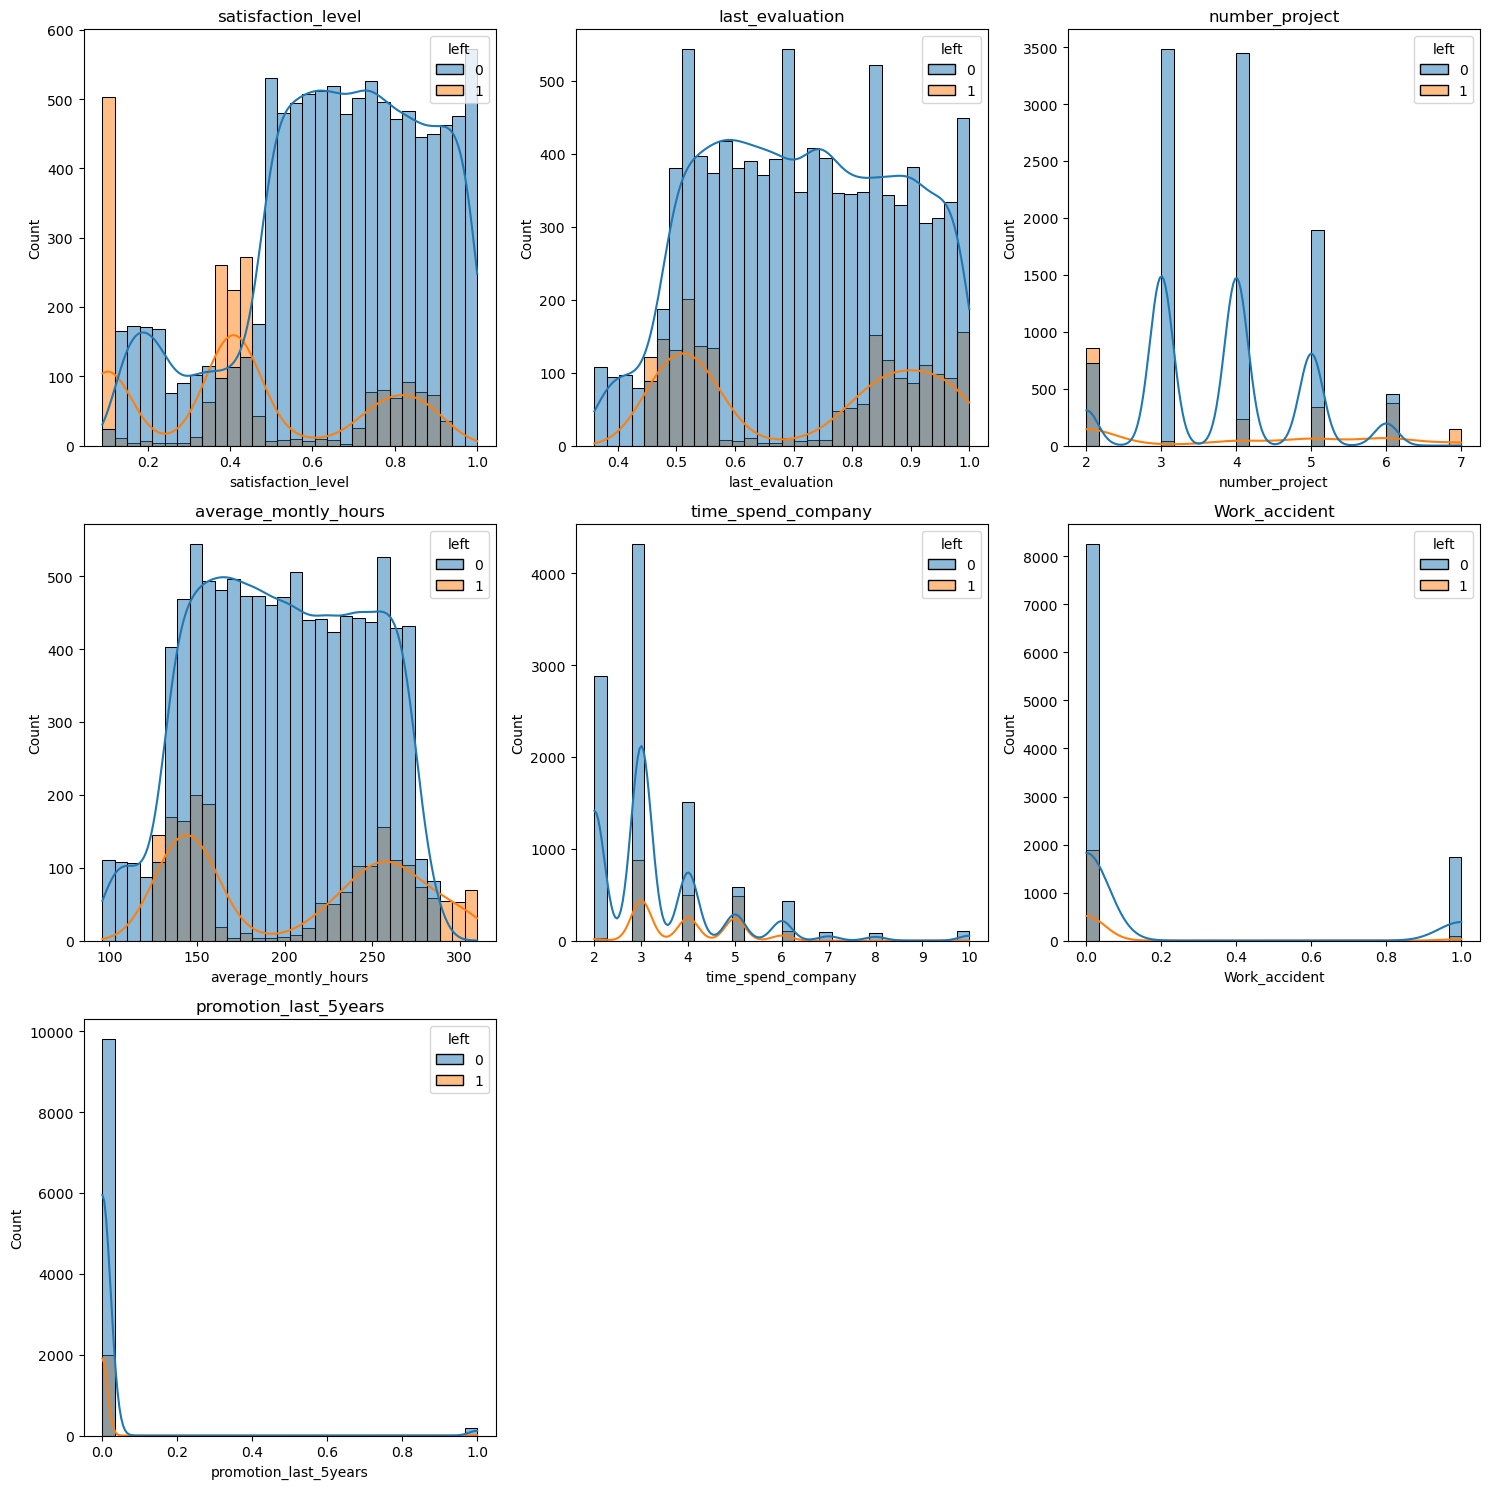

In [31]:
n = len(quant)
n_cols = 3  # 3 plots per row
n_rows = int(np.ceil(n / n_cols))

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(quant, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='left', kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


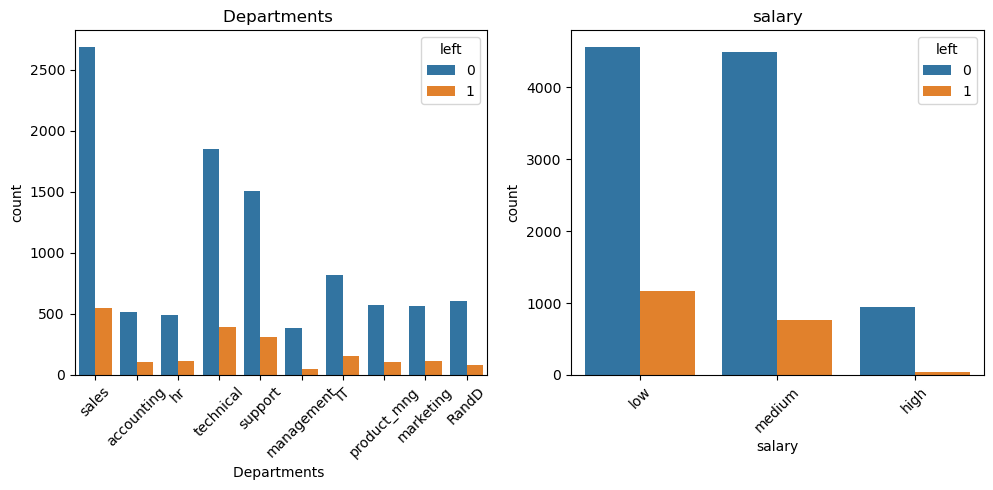

In [32]:
n = len(cat)
if n > 0:
    n_cols = 3
    n_rows = int(np.ceil(n / n_cols))

    plt.figure(figsize=(15, 5*n_rows))
    for i, col in enumerate(cat, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=col, hue='left')
        plt.title(col)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 🧪 T-test on Satisfaction Level

In [34]:
left = df[df['left'] == 1]['satisfaction_level']
stay = df[df['left'] == 0]['satisfaction_level']
t, p = ttest_ind(left, stay)
print("T-Test (satisfaction_level vs left)")
print(f"T = {t:.2f}, p = {p:.4f}")
print("Significant!" if p < 0.05 else "Not significant")
print()


T-Test (satisfaction_level vs left)
T = -40.99, p = 0.0000
Significant!



## 🧪 Chi-Square Test on Salary

In [36]:
table = pd.crosstab(df['salary'], df['left'])
chi2, p, dof, exp = chi2_contingency(table)
print("Chi-Squared Test (salary vs left)")
print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print("Significant!" if p < 0.05 else "Not significant")
print()


Chi-Squared Test (salary vs left)
Chi2 = 175.21, p = 0.0000
Significant!



## 📈 Plot Correlation Heatmap

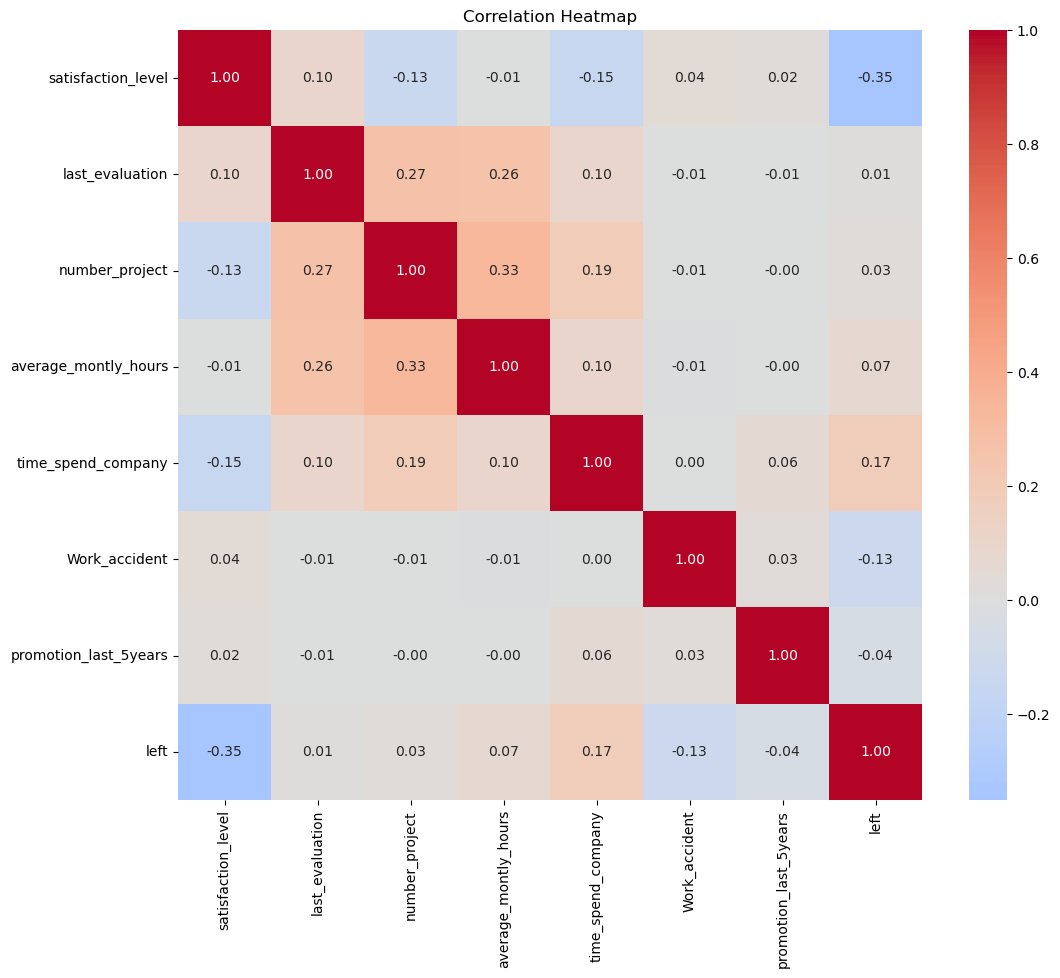

In [38]:
corr_columns = quant + ['left']

plt.figure(figsize=(12, 10))
correlation_matrix = df[corr_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
two_value = []
values = []
for col in cat:
    if len(df[col].unique())==2:
        two_value.append(col)
    else:
        values.append(col)
    print(f'{col}: {df[col].unique()}\n')

Departments : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

salary: ['low' 'medium' 'high']



## 🧮 One-Hot Encode Categorical Features

In [42]:
df = pd.get_dummies(df,columns=values,drop_first=True)

In [43]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,False,False,False,True,False,False,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,False,False,False,False,True,False,False,False,False,False,False


In [75]:
df.to_csv('Encoder.csv',index=False)